In [1]:
#S-資產價格
#K-行使價
#T-期間
#r-無風險利率
#資產波動率sigma


import numpy as np
import scipy.stats as si
S, K, T, r, sigma = 90, 100, 0.5, 0.01, 0.3
def BS(S,K,T,r,sigma): 
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))    
    call = S*si.norm.cdf(d1,0.0,1.0)-K*np.exp(-r*T)*si.norm.cdf(d2,0.0,1.0)#買入
    put = -S*si.norm.cdf(-d1,0.0,1.0)+K*np.exp(-r*T)*si.norm.cdf(-d2,0.0,1.0)#賣出
    return call,put
BS_call, BS_put= BS(S,K,T,r,sigma)
print ('S,K,T,r,sigma=',S,K,T,r,sigma)
print ('BS_call=',round(BS_call,4),', BS_put=', round(BS_put,4))

S,K,T,r,sigma= 90 100 0.5 0.01 0.3
BS_call= 4.1281 , BS_put= 13.6294


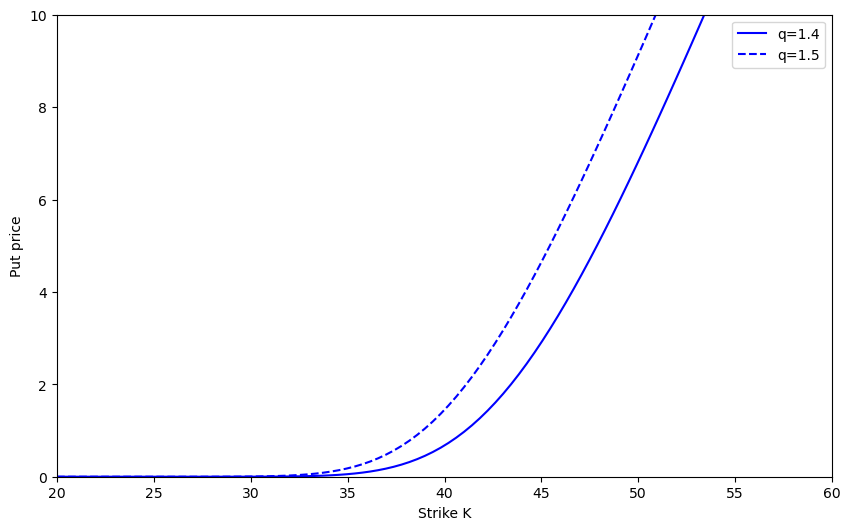

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

def black_scholes_call(S, K, T, r, sigma, q):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) 
    return put_price

# 設定參數
S = 100 # 資產價格
T = 0.6  # 期間（年）
r = 0.01# 無風險利率
sigma = 0.15 # 波動率

# 不同的履約價（K）
K_values = np.linspace(20, 60, 100)
# 不同的 q 值
q_values = [1.4, 1.5]

# 計算買權（call）的價格，分別對應不同的 q 值
call_prices_q1_4 = [black_scholes_call(S, K, T, r, sigma, q=1.4) for K in K_values]
call_prices_q1_5 = [black_scholes_call(S, K, T, r, sigma, q=1.5) for K in K_values]

# 繪製價格曲線
plt.figure(figsize=(10, 6))
plt.plot(K_values, call_prices_q1_4, label='q=1.4', linestyle='solid',color='blue')
plt.plot(K_values, call_prices_q1_5, label='q=1.5', linestyle='dashed',color='blue')
plt.xlabel('Strike K')
plt.ylabel('Put price')
plt.legend() 
plt.xlim(20, 60) 
plt.ylim(0,10)# 設定 y 軸範圍
plt.show()